In [71]:
import pandas as pd
import seaborn as sns
import numpy as np

In [47]:
df = sns.load_dataset('iris')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
103,6.3,2.9,5.6,1.8,virginica
61,5.9,3.0,4.2,1.5,versicolor
115,6.4,3.2,5.3,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
119,6.0,2.2,5.0,1.5,virginica
19,5.1,3.8,1.5,0.3,setosa
36,5.5,3.5,1.3,0.2,setosa
33,5.5,4.2,1.4,0.2,setosa
125,7.2,3.2,6.0,1.8,virginica
65,6.7,3.1,4.4,1.4,versicolor


In [48]:
from sklearn.preprocessing import LabelEncoder

In [57]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

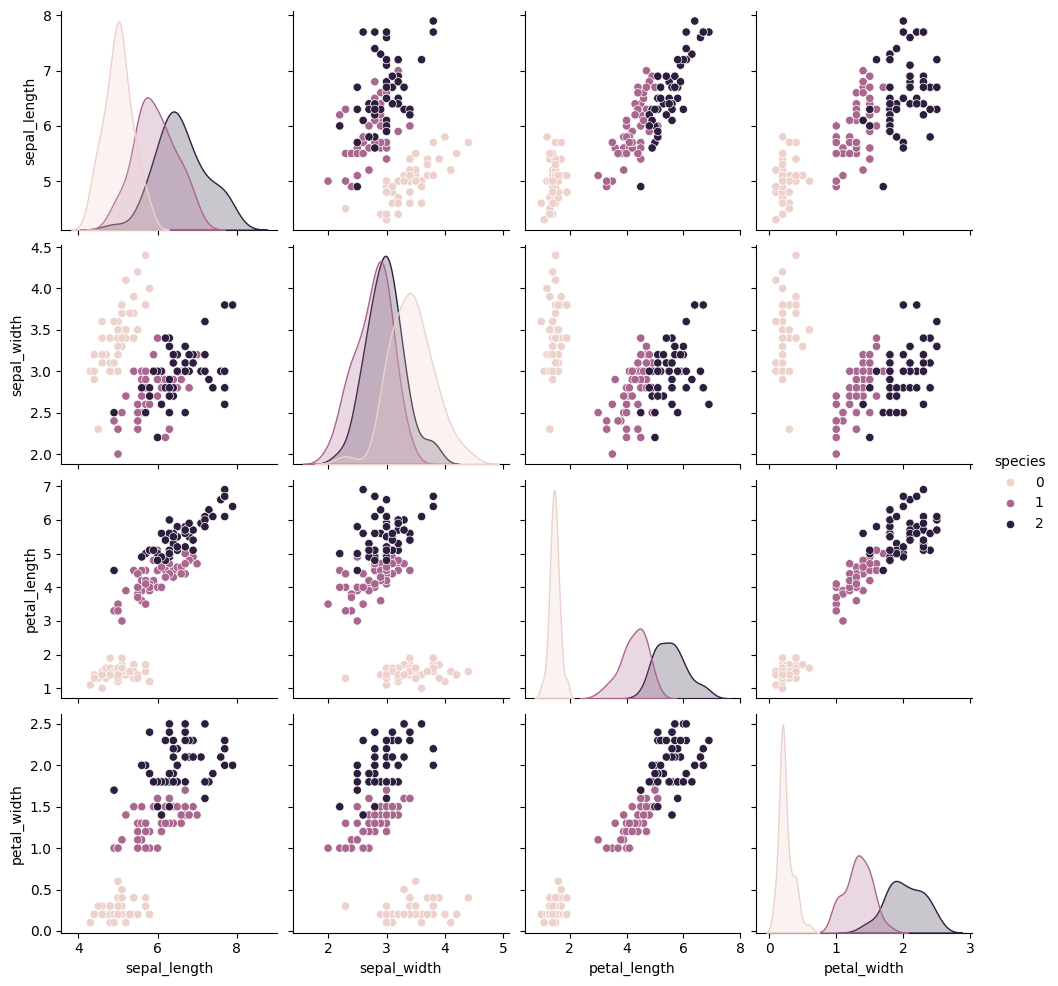

In [58]:
sns.pairplot(data=df, hue='species')

In [59]:
new_df = df[df['species' ] != 0][['sepal_length', 'petal_width', 'species']]

In [60]:
new_df.head()


,sepal_length,petal_width,species
50,7.0,1.4,1
51,6.4,1.5,1
52,6.9,1.5,1
53,5.5,1.3,1
54,6.5,1.5,1


In [61]:
new_df.shape

(100, 3)

In [66]:
X = new_df.iloc[:,0:-1]
y = new_df.iloc[:,-1]


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [68]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = KNeighborsClassifier()

In [69]:
estimators = [('lr', clf1), ('dt', clf2), ('rf', clf3), ('kn', clf4)]

In [72]:
for estimator in estimators:
    x = cross_val_score(estimator[1], X,y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(x),2))


lr 0.93
dt 0.89
rf 0.9
kn 0.94


## Voting Classifier

In [73]:
from sklearn.ensemble import VotingClassifier

### 1. Hard voting


In [75]:
vc = VotingClassifier(estimators=estimators, voting='hard')
x = cross_val_score(vc, X,y,cv=10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.92


### 2. Soft voting

In [82]:
vc = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vc, X,y, cv=10, scoring='accuracy')
print(np.round(np.mean(x), 2))

0.9


### 3. Weighted Voting (hard)

In [84]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
           vc = VotingClassifier(estimators=estimators, voting='hard')
           x = cross_val_score(vc, X,y, cv=10, scoring='accuracy')
           print('for i={}, j={}, k={}'.format(i,j,k), np.round(np.mean(x),2))

for i=1, j=1, k=1 0.92
for i=1, j=1, k=2 0.92
for i=1, j=1, k=3 0.92
for i=1, j=2, k=1 0.92
for i=1, j=2, k=2 0.92
for i=1, j=2, k=3 0.92
for i=1, j=3, k=1 0.92
for i=1, j=3, k=2 0.92
for i=1, j=3, k=3 0.92
for i=2, j=1, k=1 0.92
for i=2, j=1, k=2 0.92
for i=2, j=1, k=3 0.92
for i=2, j=2, k=1 0.92
for i=2, j=2, k=2 0.92
for i=2, j=2, k=3 0.92
for i=2, j=3, k=1 0.92
for i=2, j=3, k=2 0.92
for i=2, j=3, k=3 0.92
for i=3, j=1, k=1 0.92
for i=3, j=1, k=2 0.92
for i=3, j=1, k=3 0.92
for i=3, j=2, k=1 0.92
for i=3, j=2, k=2 0.91
for i=3, j=2, k=3 0.92
for i=3, j=3, k=1 0.92
for i=3, j=3, k=2 0.92
for i=3, j=3, k=3 0.92


### 4. weighted voting (soft)

In [85]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
           vc = VotingClassifier(estimators=estimators, voting='soft')
           x = cross_val_score(vc, X,y, cv=10, scoring='accuracy')
           print('for i={}, j={}, k={}'.format(i,j,k), np.round(np.mean(x),2))

for i=1, j=1, k=1 0.9
for i=1, j=1, k=2 0.9
for i=1, j=1, k=3 0.9
for i=1, j=2, k=1 0.9
for i=1, j=2, k=2 0.9
for i=1, j=2, k=3 0.9
for i=1, j=3, k=1 0.9
for i=1, j=3, k=2 0.9
for i=1, j=3, k=3 0.9
for i=2, j=1, k=1 0.9
for i=2, j=1, k=2 0.9
for i=2, j=1, k=3 0.9
for i=2, j=2, k=1 0.9
for i=2, j=2, k=2 0.9
for i=2, j=2, k=3 0.9
for i=2, j=3, k=1 0.9
for i=2, j=3, k=2 0.9
for i=2, j=3, k=3 0.9
for i=3, j=1, k=1 0.9
for i=3, j=1, k=2 0.9
for i=3, j=1, k=3 0.9
for i=3, j=2, k=1 0.9
for i=3, j=2, k=2 0.9
for i=3, j=2, k=3 0.9
for i=3, j=3, k=1 0.9
for i=3, j=3, k=2 0.9
for i=3, j=3, k=3 0.9


## Classifier of same algo

In [86]:
from sklearn.svm import SVC

In [95]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)

estimators = [('svm1', svm1), ('svm2', svm2), ('svm3', svm3), ('svm4', svm4)]

for estimator in estimators:
    x = cross_val_score(estimator[1], X,y,cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(x),2))


svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81


In [96]:
vc1 = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vc1, X,y,cv=10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


In [97]:
vc1 = VotingClassifier(estimators=estimators, voting='hard')
x = cross_val_score(vc1, X,y,cv=10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.89
